In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

from sklearn import ensemble

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix as cm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
df = pd.read_csv("tablet.csv")
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


## Keşifçi Veri Analizi (EDA)

In [4]:
df.shape

(2000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Hedef değişkenin ne kadar dengeli dağıldığını gözlemleyelim. (Hedef değişken = Fiyat Aralığı)

In [6]:
df.FiyatAraligi.value_counts()

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

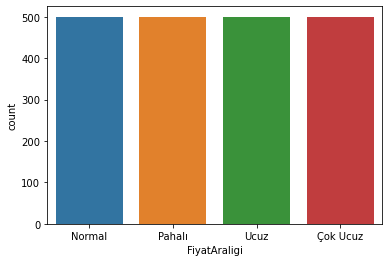

In [7]:
# Görselleştirelim...
sns.countplot(x = "FiyatAraligi", data=df);

Sayısal değişkenler arasında **korelasyon** olup olmadığını gözlemleyelim.
> En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [8]:
corr = df.corr()
corr

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Korelasyon katsayısı “r” ile gösterilir ve -1 ile +1 arasında değerler alır.

• r= -1 ise tam negatif doğrusal bir ilişki vardır.

• r= +1 ise tam pozitif doğrusal bir ilişki vardır.

• r= 0 ise iki değişken arasında ilişki yoktur.

Bu bağlamda r= İlişki için çıkan sonuçlar aşağıdaki aralıklara göre şu şekilde yorumlanır:

    0.00 ilişki yok
    0.01 – 0.29 düşük düzeyde ilişki
    0.30 – 0.70 orta düzeyde ilişki
    0.71 – 0.99 yüksek düzeyde ilişki
    1.00 mükemmel ilişki

* **Yukarıdaki tabloya göre en güçlü pozitif ilişki "ArkaKameraMP" ve "OnKameraMP" arasındadır.** Aralarındaki korelasyon katsayısı 0.645697'dir.

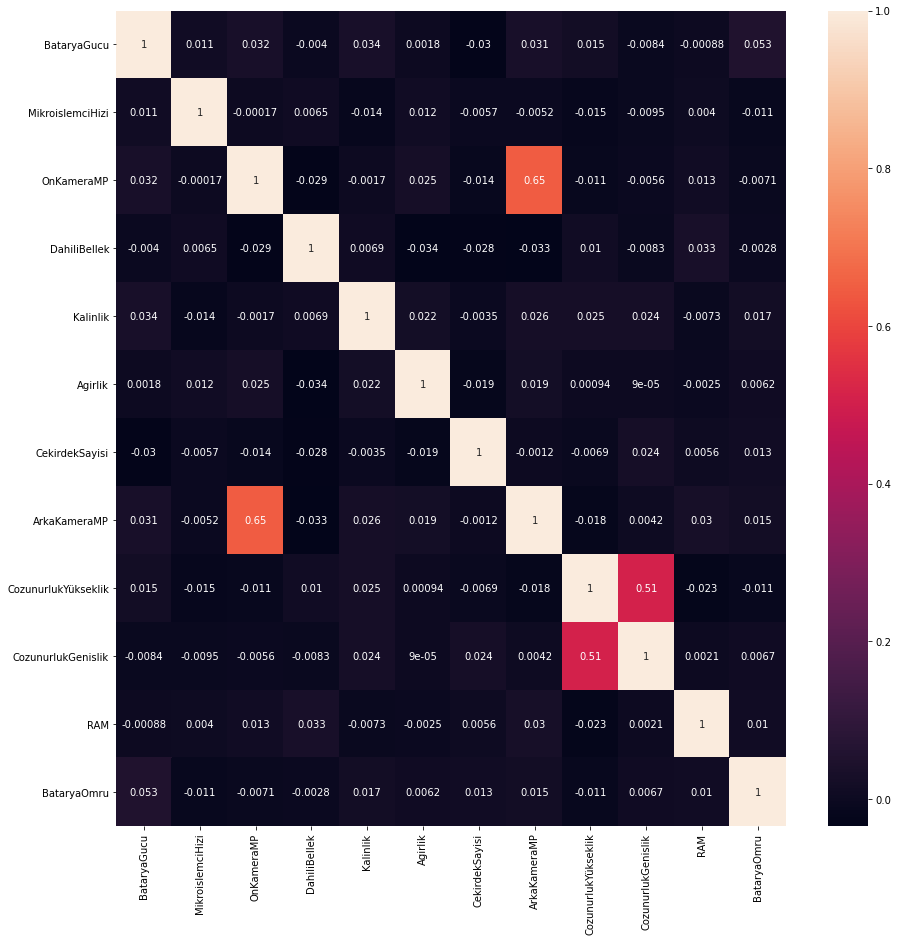

In [9]:
# korelasyon katsayılarını daha iyi gözlemleyebilmek için ısı haritası çizdirelim.
plt.figure(figsize=(15,15))
sns.heatmap(corr, 
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

> Sayısal değişkenler arasındaki temel istatistik değerlerini gözlemleyelim.

In [10]:
df.describe()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1988.000000,2000.000000
mean,1238.518500,1.522250,4.312281,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2116.243964,11.011000
std,439.418206,0.816004,4.342095,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1082.513059,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1204.750000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2129.500000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3049.500000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,20.000000


* En yüksek Ortalama: RAM
* En düşük Ortalama: Kalınlık
* En yüksek Standart Sapma: RAM (min max değerlerindende anlaşılır)
* En düşük Standart Sapma: Kalınlık (değerlerin düzenli dağıldığını kanıtlar)

> **"WiFi", "BataryaOmru"** ve **"Renk"** değişkenlerinin dağılımını gözlemleyelim.

In [11]:
df.WiFi.value_counts() # kısmen dengeli dağıldığını söyleyebiliriz.

Var    1014
Yok     986
Name: WiFi, dtype: int64

In [12]:
df.BataryaOmru.value_counts() # kısmen dengeli dağıldığını söyleyebiliriz.

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
9     100
13    100
18    100
12     99
2      99
17     98
3      94
5      93
Name: BataryaOmru, dtype: int64

In [13]:
df.Renk.value_counts() # kısmen dengeli dağıldığını söyleyebiliriz.

Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

> **"RAM"** ve **"Renk"** değişkenlerinin benzersizliğini gözlemleyelim.

In [14]:
df.RAM.unique()

array([2328., 3863., 1734., ..., 3557., 3653., 2273.])

In [15]:
df.RAM.nunique() # 1554 tane benzersiz değer var.

1554

In [16]:
df.Renk.unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [17]:
df.Renk.nunique() # 12 tane benzersiz renk var.

12

## GÖRSELLEŞTİRME

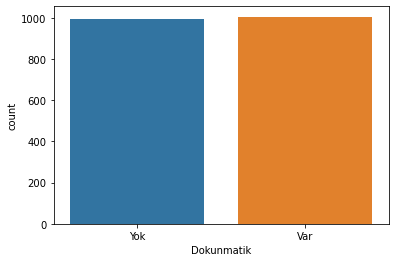

In [18]:
sns.countplot(df.Dokunmatik);

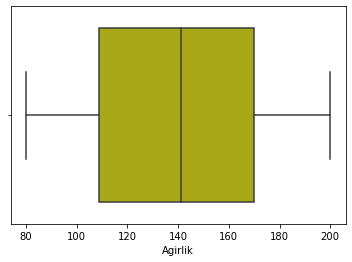

In [19]:
sns.boxplot(df.Agirlik, color= "y");

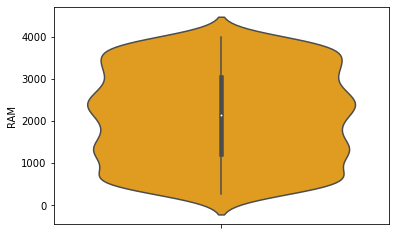

In [20]:
sns.violinplot(y="RAM", color="orange", data= df);

RAM değişkeninin değeri yoğun olarak 2000 değerinde dağılmış. Yani normal bir dağılım olduğunu söyleyebiliriz.

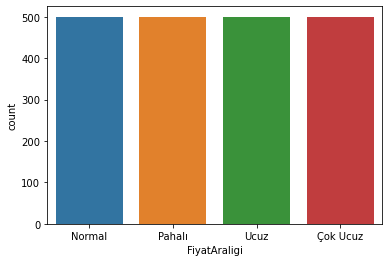

In [21]:
sns.countplot(x="FiyatAraligi", data=df); # dengeli dağılım

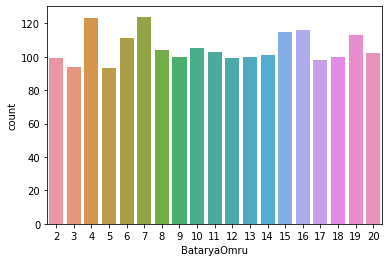

In [22]:
sns.countplot(x="BataryaOmru", data=df); # çok değişken değerler yok bu nedenle dengeli dağılım

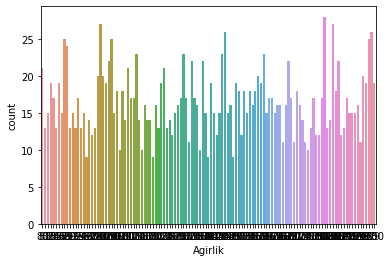

In [23]:
sns.countplot(x="Agirlik", data=df); # düzensiz ve dengeli olmayan bir dağılım

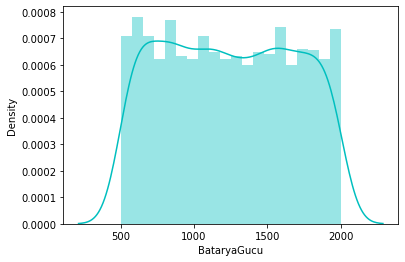

In [24]:
sns.distplot(df.BataryaGucu, bins=20, color="c");

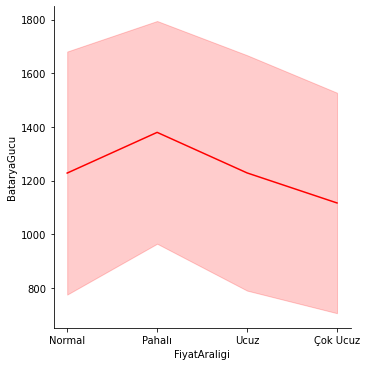

In [25]:
sns.relplot(x="FiyatAraligi", y="BataryaGucu", kind="line", ci="sd", color="red", data=df);

Grafiğe göre Fiyat Aralığı ve Batarya Gücü değişkenleri arasında doğru orantı olduğunu söyleyebiliriz.

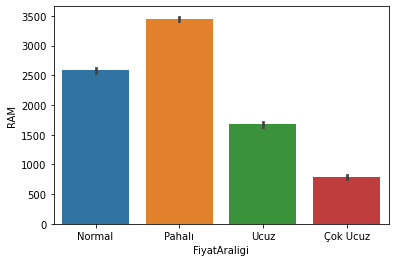

In [26]:
sns.barplot(x="FiyatAraligi", y="RAM", data=df );

Grafiğe göre RAM miktarı arttıkça fiyat araşığı da artmıştır bu nedenle ikisi arasında doğru orantı olduğunu söyleyebiliriz.

<AxesSubplot:xlabel='ArkaKameraMP', ylabel='DahiliBellek'>

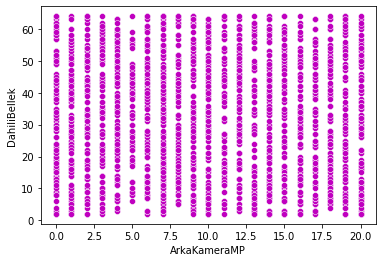

In [27]:
sns.scatterplot(x="ArkaKameraMP", y="DahiliBellek", data=df, color="m")

"ArkaKameraMP" ve "DahiliBellek" arasnda negatif bir ilişki vardır.

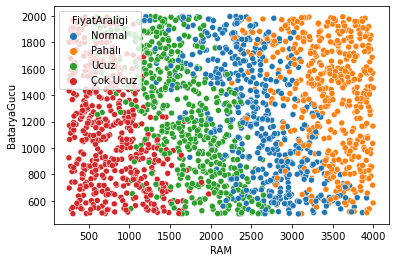

In [28]:
sns.scatterplot(x="RAM", y="BataryaGucu", hue="FiyatAraligi", data=df);

FiyatAraligi ve RAM arasında doğru orantı olduğunu daha önceden gözlmelemiştik. Aynı şekilde BataryaGucu değişkenininde FiyatAraligi değişkenini doğrudan etkilediğini söyleyebiliriz.

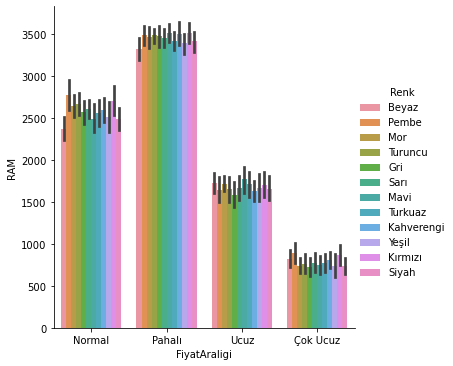

In [29]:
sns.catplot(x="FiyatAraligi", y="RAM", hue="Renk", data=df, kind="bar");

RAM ve BataryaGucu arasında doğru orantı olduğunu ve yine aynı şekilde RAM ve FiyatAraligi arasında da doğru orantı olduğunu yukarıda gözlemledik. Grafiğe göre Renk ve FiyatAraligi arasında ilişkiden söz etmek mümkün değil.

## VERİ ÖN İŞLEME

In [30]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

OnKameraMP ve RAM değişkenlerinde boş değerler vardır.

In [31]:
df.isnull().sum().sum() 

17

Veri setinde toplamda 17 tane boş veri bulunmaktadır.

> **Eksik değere sahip olan RAM değişkeninin eksik değerlerini inceleyelim.**

In [32]:
df[df.RAM.isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


* FiyatAralığı değişkenine bakacak olursak tüm eksik verilerin **Pahalı** olan verilerden oluştuğunu gözlemleyebiliriz.

RAM değişkeninin sadece FiyatAraligi değişkeninin pahalı olduğu gözlemlerde eksik değere sahip olduğu için veri setinin ortalama değerlerini değiştirmemek adına **FiyatAraliği değişkeninin pahalı olduğu gözlemlerdeki RAM değişkenlerinin ortalama değerlerini eksik değerlerine atayalım.**

In [33]:
ortalama = df[df.FiyatAraligi == "Pahalı"].RAM.mean()
df.RAM.fillna(ortalama, inplace=True)

> **Eksik değere sahip olan OnKameraMP değişkeninin eksik değerlerini inceleyelim.**

In [34]:
df[df.OnKameraMP.isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


* FiyatAralığı değişkenine bakacak olursak tüm eksik verilerin **Çok Ucuz** olan verilerden oluştuğunu gözlemleyebiliriz.

OnKameraMP değişkeninin sadece FiyatAraligi değişkeninin "Çok Ucuz" olduğu gözlemlerde eksik değere sahip olduğu için veri setinin ortalama değerlerini değiştirmemek adına **FiyatAraliği değişkeninin "Çok Ucuz" olduğu gözlemlerdeki OnKameraMP değişkenlerinin ortalama değerlerini eksik değerlerine atayalım.**

In [35]:
ort = df[df.FiyatAraligi == "Çok Ucuz"].OnKameraMP.mean()
df.OnKameraMP.fillna(ort, inplace=True)

Bütün eksik değrleri doldurduk. Bu durumu gözlemleyelim.

In [36]:
df.isnull().sum().sum()

0

> Yukarıdaki işlemler sonucu Renk ve Fiyat aralığı arasında bir ilişki bulamadık. Hedef değişkene etki etmediği için Renk değişkenini siliyoruz.

In [37]:
df.drop("Renk", axis=1, inplace=True)

**Kategorik değişkenlerin sıralanabilir / sıralanamaz (ordered/nominal) olma durumlarına göre uygun sayısallaştırma işlemlerini yapalım...**

In [38]:
LabelEncoder = LabelEncoder()

In [39]:
df["WiFi"] = LabelEncoder.fit_transform(df["WiFi"])
df["3G"] = LabelEncoder.fit_transform(df["3G"])
df["Dokunmatik"] = LabelEncoder.fit_transform(df["Dokunmatik"])
df["Bluetooth"] = LabelEncoder.fit_transform(df["Bluetooth"])
df["CiftHat"] = LabelEncoder.fit_transform(df["CiftHat"])
df["4G"] = LabelEncoder.fit_transform(df["4G"])

In [40]:
df.head() # tüm kategorik değerleri sayısallaştırdık.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal


## MAKİNE ÖĞRENMESİ MODELLEMELERİ

In [41]:
X = df.drop("FiyatAraligi", axis = 1)  # bağımsız değişken
y = df.FiyatAraligi # bağımlı değişken

In [42]:
X

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,6,487,722,1241.0,16,0,1,1
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,2,1184,1719,1070.0,14,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,14,577,1359,3557.0,12,1,0,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,6,251,1013,3653.0,15,0,0,0


In [43]:
y

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Eğitim kümesi ile GaussianNB, DecisionTree ve KNN modelleri eğitilmeli ve her bir model için karmaşıklık matrisi çizdirilmeli, doğruluk skoru elde edilerek modeller arasındaki başarı durumu karşılaştırma yapılmalıdır.

#### GaussianNB Modelini Eğitme

In [45]:
nb = GaussianNB()

In [46]:
nb_model = nb.fit(X_train, y_train)

In [47]:
y_pred = nb_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred) # doğruluk skorunu gözlemleyelim.

0.82

In [49]:
# karmaşıklık matrisini gözlemelyelim.
KarmasiklikMatrisi = confusion_matrix(y_test, y_pred)
KarmasiklikMatrisi

array([[50,  8, 13,  0],
       [ 5, 65,  1,  0],
       [13,  0, 52,  6],
       [ 0,  0,  8, 79]], dtype=int64)

In [50]:
# Modelin precission değerini gözlemleyelim.
PrecisionScore = precision_score(y_test, y_pred, average="weighted")
PrecisionScore

0.8205859195214554

* Precision değerinin yüksel olması model seçiminde önemli bir kriterdir.
* GaussianNB modelinin Precision değeri yaklaşık %82 doğrudur.
* Modelin oldukça iyi bir hassasiyete sahip olduğunu söyleyebiliriz.

In [51]:
# Modelin Recall değerini görüntüleyelim.
RecallScore = recall_score(y_test, y_pred, average="weighted")
RecallScore

0.82

> Recall: Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğini gösteren bir metriktir.

In [52]:
# Modelin F1Score değerini görüntüleyelim.
F1Score = f1_score(y_test, y_pred, average="weighted")
F1Score

0.8200636716502233

* F1_Score değeri 1'e eşitken en iyi değerine ulaşır.
* Modelin F1_Score değeri 1'e yakındır.

**Modelin F1_Score, Precision ve Recall değerlerini "ClassificationReport" aracılığıyla yazdıralım.**

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.74      0.70      0.72        71
      Pahalı       0.89      0.92      0.90        71
        Ucuz       0.70      0.73      0.72        71
    Çok Ucuz       0.93      0.91      0.92        87

    accuracy                           0.82       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.82      0.82      0.82       300



#### Decision Tree Classifier Modelini Eğitme

In [55]:
Dtc = DecisionTreeClassifier(random_state = 42, criterion="gini")
Dtc_Model = Dtc.fit(X_train, y_train)

In [56]:
y_pred = Dtc_Model.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred) # Modelin %85 oranında doğruluk oranı vardır.

0.85

In [58]:
# Karmaşıklık matrisini görüntüleyelim
KarmasiklikMatrisi2 = confusion_matrix(y_test, y_pred)
KarmasiklikMatrisi2

array([[52, 11,  8,  0],
       [ 6, 65,  0,  0],
       [ 7,  0, 59,  5],
       [ 0,  0,  8, 79]], dtype=int64)

> Başarı oranının artacağı düşünüldüğü için parametre olarak criterion="entropy" değişikliği yapıyoruz.

In [59]:
Dtc = DecisionTreeClassifier(criterion="entropy")
Dtc_model = Dtc.fit(X_train, y_train)

In [60]:
y_pred = Dtc_model.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred) # Doğruluk skoru oranı değişmemiştir. Hala %85 oranında

0.8533333333333334

In [62]:
# Karmaşıklık matrisini görüntüleyerekdeğişiklik olmadığını görüntüleyelim
KarmasiklikMatrisi3 = confusion_matrix(y_test,y_pred)
KarmasiklikMatrisi3

array([[55,  9,  7,  0],
       [10, 61,  0,  0],
       [ 8,  0, 59,  4],
       [ 0,  0,  6, 81]], dtype=int64)

In [63]:
PrecisionScore = precision_score(y_test,y_pred, average="weighted")
PrecisionScore

0.854836723882856

* Precision değerinin yüksek olması model seçimi için önemli bir kriterdir.
* DecisionTree modelinin Precision değeri yaklaşık %85 doğrudur.
* Modelin oldukça iyi bir hassasiyeti olduğunu söyleyebiliriz.

In [64]:
# Modelin Recall değerini görüntüleyelim.
RecallScore = recall_score(y_test, y_pred, average="weighted")
RecallScore

0.8533333333333334

In [65]:
# Modelin F1_Score değerini görüntülyelim
F1Score = f1_score(y_test, y_pred, average="weighted")
F1Score

0.8539933609237171

* **F1_Score değeri 1 e eşitken en iyi değerini taşır.**
* Modelin F1_Score değeri 1 e yakındır.

> Modellerin; F1Score, Precision, Recall değerilerini "classification_report" aracılığı ile yazdıralım.

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.75      0.77      0.76        71
      Pahalı       0.87      0.86      0.87        71
        Ucuz       0.82      0.83      0.83        71
    Çok Ucuz       0.95      0.93      0.94        87

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



**K-Nearest Neigbors (KNN) Modelini Eğitme**

In [67]:
knn_params = {"n_neighbors":np.arange(2,50)}

2 ile 50 arasındaki her sayıyı komşu sayısı olarak deniyecek ve en iyi komşu değerini bulacağız.

In [68]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [69]:
print("En iyi skor:", str(knn_cv.best_score_))
print("En iyi parametreler:", str(knn_cv.best_params_))

En iyi skor: 0.933531096860504
En iyi parametreler: {'n_neighbors': 13}


In [70]:
# En iyi komşu değeri 13 olduğunu gözlemledik
knn = KNeighborsClassifier(13)
knn_tuned = knn.fit(X_train, y_train)

In [71]:
y_pred = knn_tuned.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred) # Modelin %92 oranında doğruluk oranı vardır.

0.9266666666666666

In [73]:
KarmasiklikMatrisi4 = confusion_matrix(y_test,y_pred)
KarmasiklikMatrisi4

array([[63,  4,  4,  0],
       [ 2, 69,  0,  0],
       [ 4,  0, 63,  4],
       [ 0,  0,  4, 83]], dtype=int64)

In [76]:
# Modelin Precision değerini gözlemleyelim
PrecisionScore = precision_score(y_test, y_pred, average="weighted")
PrecisionScore

0.9264522533253922

* Precision değerinin yüksek olması model seçimi için önemli bir kriterdir.
* KNN modelinin Precision değeri yaklaşık %92 doğrudur.
* Modelin oldukça iyi bir hassasiyeti olduğunu söyleyebiliriz.

In [77]:
# Modelin Recoll değerini gözlemleyelim
RecallScore = recall_score(y_test, y_pred, average="weighted")
RecallScore

0.9266666666666666

In [78]:
# Modelin F1_Score değerini gözlemleyelim
F1Score = f1_score(y_test, y_pred, average="weighted")
F1Score

0.9264722222222223

* **F1_Score değeri 1 e eşitken en iyi değerini taşır.**
* Modelin F1_Score değeri 1 e yakındır.

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90        71
      Pahalı       0.95      0.97      0.96        71
        Ucuz       0.89      0.89      0.89        71
    Çok Ucuz       0.95      0.95      0.95        87

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300



F1_Score, Precision, Recall dedğerleri ile modellerin başarıları değerlendirildiğinde;
* GaussianNB, DecisionTreee ve KNN modelleri arasında en başarılı modelin KNN olduğunu söyleyebiliriz.
* GaussianNB, DecisionTreee ve KNN modelleri arasında en başarısız modelin GaussianNB olduğunu söyleyebiliriz.